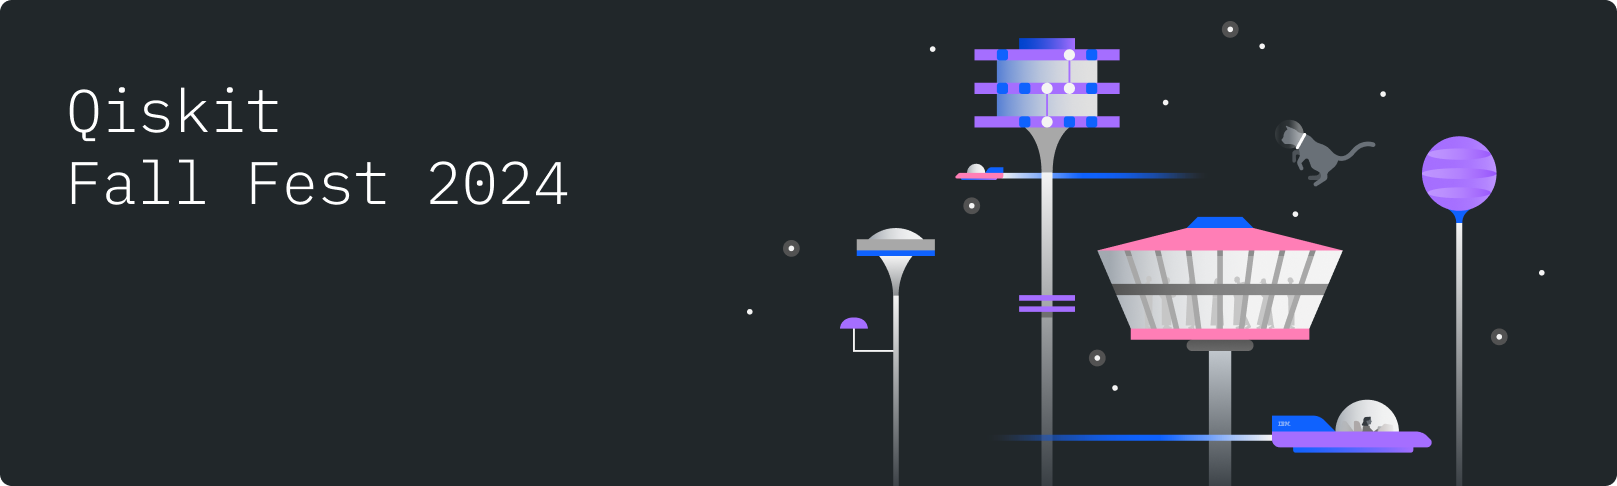

# Challenge 3: The transpiler

## Part 0: Set up and Import the required packages

In [1]:
# If you use Colab, uncomment below line and run this cell
# %pip install git+https://github.com/goseumdochy/qiskit-fall-fest-2024ku-challenge-grader.git

In [13]:
### Import the required packages
import matplotlib.pyplot as plt

from qiskit.circuit.random import random_circuit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime.fake_provider import FakeTorino
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

### IBM Quantum API token ÏùÑ Ï†ÄÏû•ÌïòÍ∏∞

1. [IBM Quantum Platform](https://quantum.ibm.com/) Ïóê Ï†ëÏÜçÌïòÏó¨ Î°úÍ∑∏Ïù∏ ÌïòÍ∏∞
2. Ïö∞Ï∏° ÏÉÅÎã®Ïùò API token Î≥µÏÇ¨ÌïòÍ∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ÌïòÍ∏∞(ÏúÑÏùò Í∑∏Î¶º Ï∞∏Í≥†)
3. ÏïÑÎûòÏùò ÏΩîÎìúÏÖÄÏóêÏÑú `Your_token_here` Î∂ÄÎ∂ÑÏùÑ Ïó¨Îü¨Î∂ÑÏùò API tokenÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ∏∞
4. Ïó¨Îü¨Î∂ÑÏùò API tokenÏùÄ ÏåçÎî∞Ïò¥Ìëú ÏïàÏóê ÏûàÏñ¥ÏïºÌï©ÎãàÎã§!!

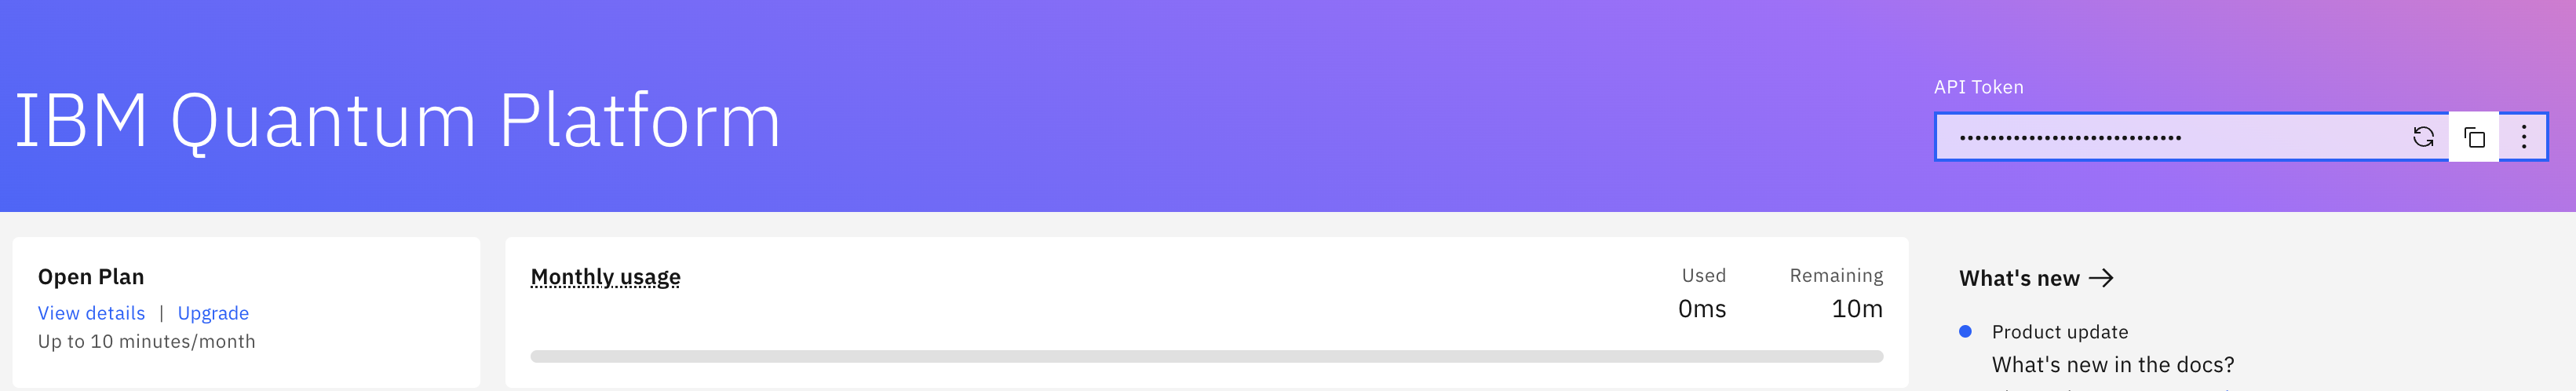

In [2]:
## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="Your_token_here",

    set_as_default=True,

    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

### Ï†ïÎ≥¥ Í∏∞ÏûÖÌïòÍ∏∞

Í∏∞ÏûÖÌï¥Ï§Ä Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú ÏÑúÎ≤ÑÏóê Ï∞∏Í∞ÄÏûê ÏãùÎ≥ÑÏù¥ ÎêòÏò§Îãà, ÌäπÌûà ÌïôÎ≤à(student_id)ÏùÄ Ï†ïÌôïÌïòÍ≤å Í∏∞ÏûÖÌï¥Ï£ºÏãúÍ∏∏ Î∞îÎûçÎãàÎã§!

In [12]:
event = "2024 Qiskit Fall Fest at Korea University"

## Write your code below here. Delete the current information and replace it with your own ##
## Make sure to write your information between the quotation marks!

username = "test"

major = "Electrical Engineering"

student_id = "202017xxxx"

## Now press the "Run" button in the toolbar above, or press Shift + Enter while you're active in this cell

## Part 1: Prologue - What is the transpiler?

Í∞ÄÏÉÅÏùò ÏßàÎ¨∏ÏúºÎ°ú ÏãúÏûëÌï¥Î¥ÖÏãúÎã§:

ÏπúÍµ¨Í∞Ä ÎãπÏã†ÏóêÍ≤å Ï∞® Ïó¥Ïá†Î•º Í±¥ÎÑ§Î©∞ "ÎÇ¥ Ï∞®Ïóê Ïó∞Î£åÎ•º Ï±ÑÏõå Ï§Ñ Ïàò ÏûàÍ≤†Îãà?"ÎùºÍ≥† ÌïúÎã§Î©¥, ÎãπÏã†ÏùÄ Î¨¥ÏóáÏùÑ Ìï¥Ïïº Ìï†ÏßÄ Ïñ¥ÎñªÍ≤å ÏïåÍπåÏöî?

Î¨ºÎ°† ÎãπÏã†ÏùÄ Ïö¥Ï†ÑÎ©¥ÌóàÏ¶ùÏùÄ Í∞ÄÏßÄÍ≥† ÏûàÎã§Í≥† Ìï©ÏãúÎã§. ÏπúÍµ¨Í∞Ä Ïñ¥Îñ§ Ï∞®Î•º Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ Ïñ¥ÎñªÍ≤å ÏïåÏ£†? Í∏∞Ïñ¥ Î≥ÄÏÜçÍ∏∞Îäî Ïñ¥ÎîîÏóê ÏûàÍ≥†, Î∞©Ìñ•ÏùÑ ÌãÄ Îïå ÍπúÎπ°Ïù¥Îäî Ïñ¥ÎñªÍ≤å ÏºúÎÇòÏöî? Ïó∞Î£å ÌÉ±ÌÅ¨Î•º Ïó¨Îäî Î∞©Î≤ïÏùÄ? ÎßåÏïΩ Í∑∏ Ï∞®Í∞Ä Ïó∞Î£å ÌÉ±ÌÅ¨Í∞Ä ÏóÜÎäî Ï†ÑÍ∏∞Ï∞®ÎùºÎ©¥ Ïñ¥ÎñªÍ≤å ÌïòÏ£†??

Îã§ÌñâÌûàÎèÑ, Ïù∏Í∞ÑÏùò ÎáåÎäî ÎòëÎòëÌï©ÎãàÎã§. Ï£ºÏñ¥ÏßÑ ÏßÄÏãúÎ•º Î∞õÏïÑÎì§Ïù¥Í≥†, Ï∞®ÎüâÏùÑ ÌååÏïÖÌïòÏó¨ Ï£ºÏñ¥ÏßÑ ÏßÄÏãúÎ•º Ï∞®ÎüâÏóê ÎßûÍ≤å Ïù¥ÌñâÌï† Ïàò ÏûàÏ£†.

Ïù¥Í≤ÉÏù¥ Î∞îÎ°ú QiskitÏóêÏÑú **Ìä∏ÎûúÏä§ÌååÏùºÎü¨(transpiler)**Ïùò Î≥∏ÏßàÏûÖÎãàÎã§.

TranspilationÏùÄ Ï£ºÏñ¥ÏßÑ ÏûÖÎ†• (ÎÖºÎ¶¨Ï†Å) ÏñëÏûê ÌöåÎ°úÎ•º ÌäπÏ†ï ÏñëÏûê Ïû•ÏπòÏóê ÎßûÎäî ÎèôÎì±Ìïú ÌöåÎ°úÎ°ú Îã§Ïãú ÏûëÏÑ±ÌïòÍ±∞ÎÇò, Ïã§Ï†ú ÏñëÏûê ÏãúÏä§ÌÖúÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌï¥ ÌöåÎ°úÎ•º ÏµúÏ†ÅÌôîÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.

Ïù¥ Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌïú Ïù¥Ïú†Îäî Î™®Îì† ÏñëÏûê Ïû•ÏπòÍ∞Ä ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú ÏûëÎèôÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Ìïú Ïû•ÏπòÏóê Î≥¥ÎÇ∏ ÏßÄÏãúÍ∞Ä Îã§Î•∏ ÏñëÏûê Î∞±ÏóîÎìúÏóêÏÑúÎäî Ìò∏ÌôòÎêòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. TranspilationÏùÄ Ïû•ÏπòÏùò basis Í≤åÏù¥Ìä∏ ÏßëÌï©, ÏñëÏûê Ïπ©Ïùò ÏúÑÏÉÅÏ†Å Íµ¨Ï°∞, ÌÉÄÏù¥Î∞ç Ï†úÏïΩ Îì±ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏûëÎèôÌïòÎ©∞, Ïù¥Î•º Ïù¥Î≤à ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÌÉêÍµ¨Ìï† ÏòàÏ†ïÏûÖÎãàÎã§.

TranspilerÏùò Î™©ÌëúÎäî ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÏûàÎäî ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥ÏóêÏÑú ÏµúÏÉÅÏùò ÏÑ±Îä•ÏùÑ ÏñªÎäî Í≤ÉÏûÖÎãàÎã§. ÎåÄÎ∂ÄÎ∂ÑÏùò ÌöåÎ°úÎäî ÌäπÏ†ï ÌÉÄÍ≤ü Ïû•ÏπòÏôÄ Ìò∏ÌôòÎêòÎèÑÎ°ù Î≥ÄÌôòÏùÑ Í±∞Ï≥êÏïº ÌïòÎ©∞, Í≤∞Í≥ºÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÎÖ∏Ïù¥Ï¶àÎ•º Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ ÏµúÏ†ÅÌôîÎêòÏñ¥Ïïº Ìï©ÎãàÎã§.

ÏòàÏãúÎ•º Îì§ÏûêÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÌöåÎ°úÍ∞Ä transpilerÎ•º Í±∞ÏπòÎ©¥

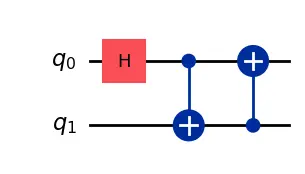

ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÌöåÎ°úÍ∞Ä Îê† Ïàò ÏûàÏäµÎãàÎã§.

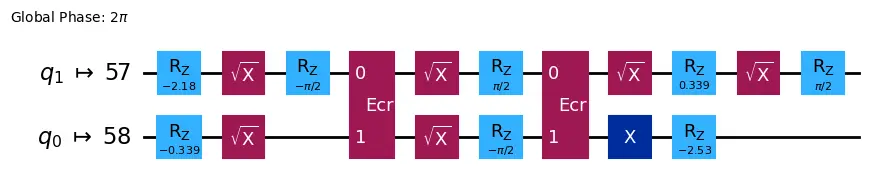

Í∑∏Î¶¨Í≥† Ìä∏ÎûúÏä§ÌååÏùºÎü¨Îäî Ìï¥Îãπ ÏñëÏûê Ïª¥Ìì®ÌÑ∞Í∞Ä ÏàòÏö©Ìï† Ïàò ÏûàÎäî **basis Í≤åÏù¥Ìä∏**ÎÇò Î™ÖÎ†πÎßåÏùÑ ÏÇ¨Ïö©ÌïòÏó¨, ÏõêÎûò ÏõêÌïòÎçò ÌöåÎ°úÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§. ÎòêÌïú, ÎÖ∏Ïù¥Ï¶àÏùò ÏòÅÌñ•ÏùÑ ÏµúÏÜåÌôîÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥Îü¨Ìïú Î™ÖÎ†πÏùÑ ÏµúÏ†ÅÌôîÌï©ÎãàÎã§. 

Ïù¥ Í≥ºÏ†ïÏùÄ Ï£ºÏñ¥ÏßÑ ÏñëÏûê Ïû•ÏπòÏùò ÌäπÏÑ±Ïóê ÎßûÍ≤å ÌöåÎ°úÎ•º Ï°∞Ï†ïÌïòÏó¨ ÏµúÏ†ÅÏùò ÏÑ±Îä•ÏùÑ ÎÅåÏñ¥ÎÇº Ïàò ÏûàÎèÑÎ°ù ÎèïÎäî ÌïµÏã¨Ï†ÅÏù∏ Í≥ºÏ†ïÏûÖÎãàÎã§.

### Basis Í≤åÏù¥Ìä∏ÎûÄ Î¨¥ÏóáÏùºÍπå?

ÏñëÏûêÏª¥Ìì®ÌÑ∞Ïùò basis Í≤åÏù¥Ìä∏ÎûÄ Î¨¥ÏóáÏùºÍπåÏöî? ÌïòÎÇòÏùò ÎπÑÌä∏Ïóê 0Í≥º 1ÏÉÅÌÉúÎßå Ï°¥Ïû¨ÌïòÎäî Í≥†Ï†ÑÏª¥Ìì®ÌÑ∞ÏôÄÎäî Îã§Î•¥Í≤å ÏñëÏûêÏª¥Ìì®ÌÑ∞Îäî Î≥µÏÜåÏàò amplitude Í∞úÎÖêÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§. ÌïòÎÇòÏùò ÌÅêÎπÑÌä∏Îßå ÏÉùÍ∞ÅÌïòÎçîÎùºÎèÑ Í∞ÄÏßà Ïàò ÏûàÎäî ÏñëÏûê ÏÉÅÌÉúÎäî Î¨¥ÏàòÌûà ÎßéÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Î¨¥ÏàòÌûà ÎßéÏùÄ Î≥ÄÌôòÏóê ÎåÄÌïú Î™®Îì† Ïó∞ÏÇ∞ Í∏∞Îä•ÏùÑ ÏñëÏûêÏª¥Ìì®ÌÑ∞Ïóê Îã¥Îäî Í≤ÉÏùÄ Î∂àÍ∞ÄÎä• Ìï©ÎãàÎã§. Í∑∏ÎûòÏÑú ÏñëÏûêÏª¥Ìì®ÌÑ∞Îäî ÌäπÏ†ï ÏàòÌïôÏ†Å Íµ¨Ï°∞Î•º ÎßåÏ°±ÌïòÎäî basis Í≤åÏù¥Ìä∏ ÏßëÌï©ÏùÑ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Íµ¨ÌòÑÌï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Í≥ÑÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Í∑∏ Î≥¥Îã§ Îçî Î≥µÏû°Ìïú Ïó∞ÏÇ∞ÏùÄ Í∑∏Îü¨Ìïú basis Í≤åÏù¥Ìä∏Îì§Ïùò Ï°∞Ìï©ÏúºÎ°ú Íµ¨ÌòÑÏùÑ ÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Ïù¥Í≤ÉÍ≥º Í¥ÄÎ†® ÏûàÎäî Í∞úÎÖêÏúºÎ°úÎäî [Universal quantum gates](https://en.wikipedia.org/wiki/Quantum_logic_gate#Universal_quantum_gates)ÏôÄ [Solovay-Kitaev theorem](https://en.wikipedia.org/wiki/Solovay%E2%80%93Kitaev_theorem)Ïù¥ ÏûàÏäµÎãàÎã§. ChallengeÍ∞Ä Ï¢ÖÎ£åÎêú Ïù¥ÌõÑ, Í¥ÄÏã¨ ÏûàÏúºÏã† Î∂ÑÏùÄ ÎßÅÌÅ¨Î•º ÌÜµÌï¥ ÎÇ¥Ïö©ÏùÑ Î≥¥ÏãúÎ©¥ Ï¢ãÏùÑ Í≤É Í∞ôÏäµÎãàÎã§. ÌäπÌûà group theory, Í∑∏ Ï§ëÏóêÏÑúÎèÑ Lie group Í∞úÎÖêÏóê ÎåÄÌï¥ Ïûò ÏïÑÏãúÎäî Î∂ÑÏùÄ Solovay-Kitaev theorem Í¥ÄÎ†® ÎÇ¥Ïö©ÏùÑ Ìïú Î≤à Î≥¥ÏãúÎäî Í≤ÉÏùÑ Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§.

ÏïÑÎûòÏùò ÏΩîÎìúÏÖÄÏóêÏÑúÎäî IBMÏùò ÏñëÏûêÏª¥Ìì®ÌÑ∞ Ï§ë ÌïòÎÇòÏù∏ ibm_brisbaneÏùò basis Í≤åÏù¥Ìä∏Î•º Î≥º Ïàò ÏûàÎäî ÏΩîÎìúÍ∞Ä Îã¥Í≤® ÏûàÏäµÎãàÎã§.

In [32]:
# Basis gates of ibm_brisbane machine.

# Select a backend
backend = service.backend('ibm_brisbane')
# backend = service.least_busy(operational=True, simulator=False)

backend.configuration().basis_gates

NameError: name 'service' is not defined

QiskitÏùò **transpiler**Îäî ÏñëÏûê ÌöåÎ°úÏùò ÍπäÏù¥ÏôÄ Î≥µÏû°ÏÑ±ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ Î™®ÎìàÌôî Î∞è ÌôïÏû•ÏÑ±ÏùÑ ÏóºÎëêÏóê ÎëêÍ≥† ÏÑ§Í≥ÑÎêú Qiskit SDKÏùò ÌïµÏã¨ Íµ¨ÏÑ± ÏöîÏÜåÏûÖÎãàÎã§. Ïù¥ transpilerÏùò Ï£ºÏöî Î™©ÌëúÎäî ÏÉàÎ°úÏö¥ ÌöåÎ°ú Î≥ÄÌôò(a.k.a. transpiler passes)ÏùÑ ÏûëÏÑ±ÌïòÍ≥† Í∏∞Ï°¥Ïùò Îã§Î•∏ Ìå®Ïä§ÏôÄ Í≤∞Ìï©ÌïòÏó¨ ÏñëÏûê ÌöåÎ°úÎ•º ÏµúÏ†ÅÌôîÌïòÎäî Í≤ÉÏûÖÎãàÎã§. Ïñ¥Îñ§ Ìå®Ïä§Í∞Ä Ìï®Íªò Ïó∞Í≤∞ÎêòÍ≥† Ïñ¥Îñ§ ÏàúÏÑúÎ°ú Ïã§ÌñâÎêòÎäîÏßÄÎäî ÏµúÏ¢Ö Í≤∞Í≥ºÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§. Ïù¥ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÄ [PassManager](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.PassManager)ÏôÄ [StagedPassManager](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.StagedPassManager) Í∞ùÏ≤¥Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎê©ÎãàÎã§.

### PassManagerÏôÄ StagedPassManager
- **StagedPassManager**Îäî ÌïòÎÇò Ïù¥ÏÉÅÏùò PassManagerÏùò Ïã§ÌñâÏùÑ Ï°∞Ïú®ÌïòÍ≥†, Ïù¥Îì§Ïù¥ Ïã§ÌñâÎêòÎäî ÏàúÏÑúÎ•º Í≤∞Ï†ïÌï©ÎãàÎã§. 
- **PassManager** Í∞ùÏ≤¥Îäî ÌïòÎÇò Ïù¥ÏÉÅÏùò Ìå®Ïä§Î•º Î™®ÏïÑ ÎÜìÏùÄ Ïª¨Î†âÏÖòÏóê Î∂àÍ≥ºÌï©ÎãàÎã§. 

ÎπÑÏú†ÌïòÏûêÎ©¥, **StagedPassManager**Îäî Ïò§ÏºÄÏä§Ìä∏ÎùºÏùò ÏßÄÌúòÏûêÏôÄ Í∞ôÍ≥†, **PassManagers**Îäî Îã§ÏñëÌïú ÏïÖÍ∏∞ ÏÑπÏÖò, Í∑∏Î¶¨Í≥† **Pass** Í∞ùÏ≤¥Îì§ÏùÄ Í∞úÎ≥Ñ ÏùåÏïÖÍ∞ÄÏóê Ìï¥ÎãπÌï©ÎãàÎã§. 

Ïù¥Îü¨Ìïú Î∞©ÏãùÏúºÎ°ú ÌïòÎìúÏõ®Ïñ¥ Ìö®Ïú®Ï†ÅÏù∏ ÏñëÏûê ÌöåÎ°úÎ•º Íµ¨ÏÑ±ÌïòÏó¨ Ïú†Ìã∏Î¶¨Ìã∞ Í∑úÎ™®Ïùò ÏûëÏóÖÏùÑ ÏàòÌñâÌïòÎ©¥ÏÑúÎèÑ ÎÖ∏Ïù¥Ï¶àÎ•º Í¥ÄÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

Îçî ÎßéÏùÄ ÏÑ∏Î∂ÄÏ†ïÎ≥¥Îäî IBM Quantum Platform Î¨∏ÏÑúÏùò [Transpile](https://docs.quantum.ibm.com/transpile) ÏÑπÏÖòÏùÑ Ï∞∏Ï°∞ÌïòÏÑ∏Ïöî.

### TranspilationÏùò 6Í∞úÏùò Îã®Í≥ÑÏôÄ ÎØ∏Î¶¨ Íµ¨Ï∂ïÎêú 4Í∞ÄÏßÄ ÏàòÏ§ÄÏùò transpilation

ÌïòÎìúÏõ®Ïñ¥ Ï†úÏïΩ Ï°∞Í±¥Ïóê ÎßûÍ≤å ÏñëÏûê ÌöåÎ°úÎ•º Îã§Ïãú ÏûëÏÑ±ÌïòÍ≥† ÏÑ±Îä•ÏùÑ ÏµúÏ†ÅÌôîÌïòÎäî Í≤ÉÏù¥ ÏâΩÏßÄÎßåÏùÄ ÏïäÏäµÎãàÎã§. QiskitÏùÄ ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÎØ∏Î¶¨ Íµ¨Ï∂ïÎêú 4Í∞úÏùò Ìä∏ÎûúÏä§ÌååÏùº ÌååÏù¥ÌîÑÎùºÏù∏Í≥º Ìï®Íªò ÌëúÏ§Ä 6Îã®Í≥ÑÏùò Ïª¥ÌååÏùº ÌùêÎ¶ÑÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§. Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÏÇ¨Ï†Ñ ÏÑ§Ï†ïÎêú Ìå®Ïä§ Îß§ÎãàÏ†ÄÎäî 6Îã®Í≥ÑÎ°ú Íµ¨ÏÑ±ÎêòÎ©∞ Í∞Å Îã®Í≥ÑÎßàÎã§ Ïó¨Îü¨ ÏòµÏÖòÏù¥ ÏûàÏäµÎãàÎã§:

1. **Init**: Ïù¥ Îã®Í≥ÑÎäî ÏãúÏä§ÌÖúÏóê ÎßûÍ≤å ÌöåÎ°úÎ•º Ïû¨ÏÑ§Ï†ïÌïòÍ∏∞ Ï†ÑÏóê ÌïÑÏöîÌïú Î™®Îì† Ï¥àÍ∏∞ Ìå®Ïä§Î•º Ïã§ÌñâÌïòÎäî Îã®Í≥ÑÏûÖÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î™ÖÎ†πÏùÑ Î∂ÑÌï¥ÌïòÏó¨ ÌöåÎ°úÎ•º Îã®Ïùº Î∞è 2-ÌÅêÎπÑÌä∏ Í≤åÏù¥Ìä∏Î°ú Ï†ÑÌôòÌïòÎäî Í≤ÉÏùÑ Ìè¨Ìï®Ìï©ÎãàÎã§. (ÌöåÎ°úÏùò Í≤åÏù¥Ìä∏ÏôÄ Ïó∞ÏÇ∞ÏùÑ Í≤ÄÏ¶ùÌïòÍ≥† Îã§Ï§ë ÌÅêÎπÑÌä∏ Í≤åÏù¥Ìä∏Î•º Îã®Ïùº Î∞è 2-ÌÅêÎπÑÌä∏ Í≤åÏù¥Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.)
2. **Layout**: Ïù¥ Îã®Í≥ÑÏóêÏÑúÎäî ÌöåÎ°úÏùò Í∞ÄÏÉÅ ÌÅêÎπÑÌä∏Î•º Ïã§Ï†ú ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Ïùò Î¨ºÎ¶¨Ï†Å ÌÅêÎπÑÌä∏Ïóê Îß§ÌïëÌïòÎäî Î†àÏù¥ÏïÑÏõÉÏùÑ Ï†ÅÏö©Ìï©ÎãàÎã§.
3. **Routing**: Ïù¥ Îã®Í≥ÑÎäî Î†àÏù¥ÏïÑÏõÉÏù¥ Ï†ÅÏö©Îêú ÌõÑÏóê Ïã§ÌñâÎêòÎ©∞, ÏõêÎûò ÌöåÎ°úÏóê SWAP Í≤åÏù¥Ìä∏Î•º Ï∂îÍ∞ÄÌïòÏó¨ Î∞±ÏóîÎìúÏùò Ïó∞Í≤∞ÏÑ±Í≥º Ìò∏ÌôòÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
4. **Translation**: Ïù¥ Îã®Í≥ÑÏóêÏÑúÎäî ÌöåÎ°úÏùò Í≤åÏù¥Ìä∏Î•º ÎåÄÏÉÅ Î∞±ÏóîÎìúÏùò basis Í≤åÏù¥Ìä∏ ÏßëÌï©ÏúºÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
5. **Optimization**: Ïù¥ Îã®Í≥ÑÎäî Ï°∞Í±¥(Ïòà: ÏßÄÏ†ïÎêú ÌöåÎ°úÏùò ÍπäÏù¥(Í∏∏Ïù¥))Ïù¥ Ï∂©Ï°±Îê† ÎïåÍπåÏßÄ Ï£ºÏöî ÏµúÏ†ÅÌôî Î£®ÌîÑÎ•º Î∞òÎ≥µ Ïã§ÌñâÌï©ÎãàÎã§.
6. **Scheduling**: Ïù¥ Îã®Í≥ÑÎäî Ïã§Ï†ú ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥ÏóêÏÑú Ïã§ÌñâÎêòÎäî ÏùºÎ†®Ïùò Ïã†Ìò∏Îì§Ïùò Ïä§ÏºÄÏ§ÑÏùÑ Ï°∞Ï†ïÌïòÎäî Ìå®Ïä§Îì§Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.

Ïù¥Îü¨Ìïú 6Í∞ÄÏßÄ Îã®Í≥ÑÎ•º ÌïòÎÇòÌïòÎÇò Îî∞Ï†∏Í∞ÄÎ©∞ ÏÇ¨Ïö©ÏûêÍ∞Ä ÏûêÏã†Ïùò ÌöåÎ°úÏôÄ ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Ïóê ÎßûÍ≤å Ï°∞Ï†àÌïòÎ©¥ Î∂ÑÎ™Ö Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§. ÌïòÏßÄÎßå Ïù¥Î•º Îã§ ÌååÏïÖÌïòÍ≥† ÏÇ¨Ïö©ÌïòÍ∏∞ Ïñ¥Î†§Ïö¥ ÏÇ¨Ïö©ÏûêÎì§ÏùÑ ÏúÑÌï¥ Qiskit ÏóêÏÑúÎäî Ïù¥ 6Í∞ÄÏßÄ Îã®Í≥ÑÏùò ÏàòÏ§ÄÏùÑ Ïûò Ï°∞Ìï©ÌïòÏó¨ ÎàÑÍµ¨ÎÇò ÏâΩÍ≤å Í∞ÄÏ†∏Îã§Í∞Ä ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî 4Í∞ÄÏßÄÏùò ÎØ∏Î¶¨ Ï†ïÏùòÎêú transpilation ÏàòÏ§ÄÎèÑ Ï†úÍ≥µÌï©ÎãàÎã§. Îî∞ÎùºÏÑú ÏñëÏûê ÌöåÎ°ú ÏµúÏ†ÅÌôîÏóê ÏùµÏàôÌïòÏßÄ ÏïäÏùÄ ÏÇ¨Ïö©ÏûêÏóêÍ≤åÎäî Ïù¥Îü¨Ìïú Ï§ÄÎπÑÎêú 4Í∞úÏùò Î£®Ìã¥ Ï§ë ÌïòÎÇòÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

### Exercise 1:

<div class="alert alert-block alert-success">

**Ìï¥ÏïºÌï† Ïùº:** ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏóêÏÑú Îã§ÏùåÏùÄ Í∞Å Îã®Í≥ÑÏóêÏÑú Î∞úÏÉùÌïòÎäî ÎÇ¥Ïö©ÏùÑ Ìï¥ÎãπÌïòÎäî transpilation Îã®Í≥Ñ Ïù¥Î¶ÑÍ≥º Ïó∞Í≤∞ÏßÄÏúºÏÑ∏Ïöî.

- **A.** Ïù¥ Îã®Í≥ÑÎäî Ïó¨Îü¨ ÏµúÏ†ÅÌôî ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌöåÎ°ú ÏûëÏóÖ ÏàòÏôÄ ÌöåÎ°úÏùò ÍπäÏù¥Î•º Ï§ÑÏù¥Îäî Îç∞ Ï§ëÏ†êÏùÑ Îë°ÎãàÎã§.
- **B.** Ïù¥ Îã®Í≥ÑÎäî ÏÑ†ÌÉùÎêú Î†àÏù¥ÏïÑÏõÉÍ≥º ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Ïùò Ïó∞Í≤∞ÏÑ±ÏùÑ Í≥†Î†§ÌïòÏó¨ ÌöåÎ°úÎ•º Ïã§ÌñâÌïòÍ∏∞ ÏúÑÌï¥ Ï†ÅÏ†àÌïú ÏàòÏùò SWAP Í≤åÏù¥Ìä∏Î•º ÏÇΩÏûÖÌï©ÎãàÎã§.
- **C.** Ïù¥ Îã®Í≥ÑÎäî Îëê Í∞ú Ïù¥ÏÉÅÏùò ÌÅêÎπÑÌä∏ÏóêÏÑú ÏûëÎèôÌïòÎäî Î≥µÏû°Ìïú Í≤åÏù¥Ìä∏Î•º ÌïòÎÇò ÎòêÎäî Îëê Í∞úÏùò ÌÅêÎπÑÌä∏ÏóêÏÑúÎßå ÏûëÎèôÌïòÎäî Í≤åÏù¥Ìä∏Î°ú Î≥ÄÌôòÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.
- **D.** Ïù¥ Îã®Í≥ÑÎäî Ïã§Ï†ú ÏñëÏûê Ïû•ÏπòÏóêÏÑú "Í∞ÄÏÉÅ" ÌÅêÎπÑÌä∏Î•º "Î¨ºÎ¶¨Ï†Å" ÌÅêÎπÑÌä∏Ïóê 1:1 Îß§ÌïëÌïòÏó¨ ÏùºÎ†®Ïùò Í≤åÏù¥Ìä∏Î•º Ïã§ÌñâÌï©ÎãàÎã§.
- **E.** Ïù¥ Îã®Í≥ÑÎäî Í≤åÏù¥Ìä∏ Ïã§Ìñâ ÏÇ¨Ïù¥Ïùò ÎåÄÍ∏∞ ÏãúÍ∞ÑÏùÑ Í≥†Î†§ÌïòÏó¨ ÏßÄÏó∞ Î™ÖÎ†πÍ≥º Í∞ôÏùÄ ÌïòÎìúÏõ®Ïñ¥ Ïù∏Ïãù ÏûëÏóÖÏùÑ Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏÇΩÏûÖÌï©ÎãàÎã§.
- **F.** Ïù¥ Îã®Í≥ÑÎäî ÌöåÎ°úÏóê ÏßÄÏ†ïÎêú Í≤åÏù¥Ìä∏Î•º ÏßÄÏ†ïÎêú Î∞±ÏóîÎìúÏùò basis Í≤åÏù¥Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.

<b>ÌûåÌä∏: </b> ÎãµÎ≥ÄÏùÄ Ìï≠ÏÉÅ ÌÅ∞Îî∞Ïò¥ÌëúÎ°ú Î¨∂Ïù∏ Ìïú Í∞úÏùò ÎåÄÎ¨∏ÏûêÏûÖÎãàÎã§. ÏòàÏãú: "A"

</div>

In [14]:
answer1 = {}

# Place the correct letter next to the corresponding stage, inside a parenthesis
# example:  ans["test"] = "M"

answer1["init"] = "C"
answer1["layout"] = "D"
answer1["routing"] = "B"
answer1["translation"] = "F"
answer1["optimization"] = "A"
answer1["scheduling"] = "E"

In [15]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge3a

grade_challenge3a(answer1, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


Ïûò Ïù¥Ìï¥ÌïòÍ≥† Í≥ÑÏãúÎÑ§Ïöî! Ïù¥Ï†ú QiskitÏùò trasnpilatioon Ïó¨ÏÑØ Îã®Í≥ÑÎ•º `preset_pass_manager`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïñ¥ÎñªÍ≤å ÌôúÏö©ÌïòÎäîÏßÄ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

## Part 2: Transpile with preset pass managers

Ïù¥ Î∂ÄÎ∂ÑÏóêÏÑúÎäî QiskitÏùò ÌëúÏ§Ä Ïó¨ÏÑØ Í∞ÄÏßÄ transpilation Îã®Í≥ÑÎ•º ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§. Î®ºÏ†Ä ÎÑ§ Í∞ÄÏßÄ ÎØ∏Î¶¨ Ï†ïÏùòÎêú transpile pipelineÏóê Ï¥àÏ†êÏùÑ ÎßûÏ∂îÍ≥†, Í∞Å Ìå®Ïä§Î•º ÏÇ¨Ïö©ÌïòÎäî Í∏∞Îä•Í≥º ÏòµÏÖòÏùÑ ÌôúÏö©ÌïòÏó¨ ÎÇòÎßåÏùò PassManagerÎ•º ÎßåÎìúÎäî Î∞©Î≤ïÏóê ÎåÄÌï¥ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

Î®ºÏ†Ä, PassmanagerÏôÄ `generate_preset_pass_manager`Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§. Ïù¥ Î∂ÄÎ∂ÑÍ≥º Ïù¥ÌõÑ Î∂ÄÎ∂ÑÏóêÏÑúÎäî transpilerÏôÄ Í¥ÄÎ†®Îêú [IBM Quantum Platform docs](https://docs.quantum.ibm.com/transpile)ÏôÄ [API reference documentation](https://docs.quantum.ibm.com/api/qiskit/transpiler)Î•º ÏûêÏ£º Ï∞∏Ï°∞ÌïòÎØÄÎ°ú, Ìï®Íªò ÏÇ¥Ìé¥Î≥¥Î©¥ÏÑú Î¨∏Ï†úÎ•º Ìë∏Îäî Í≤ÉÏùÑ Ï∂îÏ≤úÌï©ÎãàÎã§.

### What is a (staged) pass manager?

Pass managerÎäî transpiler Ìå®Ïä§ Î™©Î°ùÏùÑ Ï†ÄÏû•ÌïòÍ≥† Ïù¥Î•º ÌöåÎ°úÏóê Ïã§ÌñâÌï† Ïàò ÏûàÎäî Í∞ùÏ≤¥ÏûÖÎãàÎã§. Transpiler Ìå®Ïä§Ïùò Î™©Î°ùÏúºÎ°ú [PassManager](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.PassManager)Î•º Ï¥àÍ∏∞ÌôîÌïòÏó¨ Ìå®Ïä§ Îß§ÎãàÏ†ÄÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÌöåÎ°úÏóê ÎåÄÌï¥ transpilationÏùÑ ÌñâÌïòÎ†§Î©¥ ÌöåÎ°úÎ•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÏó¨ [run](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.PassManager#run) Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌïòÎ©¥ Îê©ÎãàÎã§.

[`StagedPassManager`](https://docs.quantum.ibm.com/transpile/transpiler-stages) ÌÅ¥ÎûòÏä§Ïóê ÏùòÌï¥ ÎÇòÌÉÄÎÇòÎäî staged pass managerÎäî ÏùºÎ∞ò Ìå®Ïä§ Îß§ÎãàÏ†ÄÏùò Ï∂îÏÉÅÌôî Î†àÎ≤® ÏúÑÏóê ÏûàÎäî ÌäπÎ≥ÑÌïú Ï¢ÖÎ•òÏùò Ìå®Ïä§ Îß§ÎãàÏ†ÄÏûÖÎãàÎã§. ÏùºÎ∞ò pass managerÎäî Ïó¨Îü¨ transpiler passesÎ°ú Íµ¨ÏÑ±ÎêòÏßÄÎßå, staged pass managerÎäî Ïó¨Îü¨ pass managersÎ°ú Íµ¨ÏÑ±Îê©ÎãàÎã§. Ïù¥Îäî Ï†ÑÏÜ°Ïù¥ ÏùºÎ∞òÏ†ÅÏúºÎ°ú Î∂ÑÎ¶¨Îêú Îã®Í≥ÑÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÎ©∞, Í∞Å Îã®Í≥ÑÍ∞Ä Ìå®Ïä§ Îß§ÎãàÏ†ÄÎ°ú ÎÇòÌÉÄÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê Ïú†Ïö©Ìïú Ï∂îÏÉÅÌôîÏûÖÎãàÎã§.

### `Preset Passmanagers`

Preset Passmanagers(`qiskit.transpiler.preset_passmanagers`)Îäî transpilationÏùÑ ÏúÑÌïú preset pass managerÎ•º ÏÉùÏÑ±ÌïòÎäî Í∏∞Îä•ÏùÑ Ìè¨Ìï®ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Preset pass managerÎäî StagedPassManagerÏùò Ïù∏Ïä§ÌÑ¥Ïä§Î°ú, ÎØ∏Î¶¨ Ï†ïÏùòÎêú transpiling pipelineÏùò Îã§ÏñëÌïú ÏµúÏ†ÅÌôî ÏàòÏ§ÄÏóêÏÑú ÌöåÎ°ú Î≥ÄÌôòÏùÑ Ïã§ÌñâÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî `generate_preset_pass_manager`Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ï†ÑÏ≤¥ pass managerÎ•º ÏÉùÏÑ±ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî Ìï®ÏàòÎì§ÏùÑ ÏÜåÍ∞úÌï©ÎãàÎã§.

### `generate_preset_pass_manager`

QiskitÏóêÏÑú `generate_preset_pass_manager`Îäî ÎØ∏Î¶¨ ÏÑ§Ï†ïÎêú pass managerÎ•º Îπ†Î•¥Í≤å ÏÉùÏÑ±ÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§. Ïù¥ Ìï®ÏàòÎäî Í∞Å Ìå®Ïä§Ïóê ÎåÄÌïú **ÏµúÏ†ÅÌôî** ÏàòÏ§ÄÍ≥º ÏòµÏÖòÏùÑ Í∞ñÏ∂ò ÎèÖÎ¶ΩÌòï `PassManager` Í∞ùÏ≤¥Î•º Íµ¨ÏÑ±ÌïòÎäî Ìé∏Î¶¨ÌïòÍ≥† Í∞ÑÎã®Ìïú Î∞©Î≤ïÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§. Ïù¥Ï†ú Ïù¥Îü¨Ìïú ÎÇ¥Ïö©Îì§ÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.

## Optimization levels

`generate_preset_pass_manager` Ìï®ÏàòÎäî Î∞òÎìúÏãú optimization_level Í∞íÏùÑ ÏûÖÎ†•ÏúºÎ°ú ÏöîÍµ¨ÌïòÎ©∞, Ïù¥ Í∞íÏùÄ transpilerÍ∞Ä ÌöåÎ°úÎ•º ÏµúÏ†ÅÌôîÌï† Îïå ÏñºÎßà ÎßåÌÅºÏùò ÎÖ∏Î†•ÏùÑ Í∏∞Ïö∏ÏùºÏßÄÎ•º Í≤∞Ï†ïÌï©ÎãàÎã§. Ïù¥ ÏòµÏÖòÏùò Í∞íÏùÄ 0, 1, 2, 3 Ï§ë ÌïòÎÇòÏùò Í∞íÏùÑ Í∞ÄÏßà Ïàò ÏûàÏäµÎãàÎã§.

ÎÜíÏùÄ optimization_levelÏùò Í∞íÏùÄ Îçî Í∏¥ ÏãúÍ∞ÑÏùÑ ÏÜåÏöîÌï¥ Îçî ÎßéÏùÄ ÏµúÏ†ÅÌôî Í≥ºÏ†ïÏù¥ Ï†ÅÏö©Îêú ÌöåÎ°úÎ•º ÎßåÎì§Ïñ¥ ÎÇ¥Î©∞, Î∞òÎåÄÎ°ú ÎÇÆÏùÄ Î†àÎ≤®Ïùò Í∞íÏùÄ Ï†ÅÏùÄ ÏãúÍ∞ÑÏúºÎ°ú Ï†ÅÏùÄ ÏµúÏ†ÅÌôî Í≥ºÏ†ïÎßåÏùÑ Ï†ÅÏö©Ìï¥ ÌöåÎ°úÎ•º transpilation Ìï©ÎãàÎã§.

<div class="alert alert-block alert-success">

### Utility function(Not Exercise problem)

TranspilationÏùò Ïã§Ï†ú Î™©ÌëúÍ∞Ä ÏñëÏûê ÌöåÎ°úÏùò Ïã§Ï†ú Ïã§Ìñâ ÏÑ±Îä•ÏùÑ Í∞úÏÑ†ÌïòÎäî Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, transpilerÎ•º ÌÜµÍ≥ºÌïòÏó¨ Î≥ÄÌôòÎêú ÌöåÎ°úÏùò ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌïòÎäî Ìï®ÏàòÎ•º Î∞ëÏóê Ï†úÍ≥µÌï¥ÎìúÎ¶ΩÎãàÎã§. Ïù¥ Ìï®ÏàòÎäî Ïù¥ Ï±åÎ¶∞ÏßÄ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÇ¨Ïö©ÌïòÍ≤å Îê† Í≤É ÏûÖÎãàÎã§.

**Ìï®Ïàò ÏÑ§Î™Ö:** Ìï®Ïàò `scoring`ÏùÄ transpiled circuit, Í∑∏Îü¨ÎãàÍπê *[final layout](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.TranspileLayout#final_layout)*,ÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑÏïº Ìï©ÎãàÎã§. Í∑∏ ÌõÑ Ìï®ÏàòÎäî ÌöåÎ°úÏùò Ï†êÏàòÎ•º Î∞òÌôòÌï¥Ïïº ÌïòÎ©∞, Ï†êÏàòÍ∞Ä 0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îçî Ï¢ãÏäµÎãàÎã§.

2-ÌÅêÎπÑÌä∏ Í≤åÏù¥Ìä∏Ïù∏ `cz` Í≤åÏù¥Ìä∏Îäî Îã®Ïùº ÌÅêÎπÑÌä∏ Í≤åÏù¥Ìä∏Ïù∏ `sx` Í≤åÏù¥Ìä∏ÏôÄ `rz` Í≤åÏù¥Ìä∏Î≥¥Îã§ Îçî ÎßéÏùÄ Ïò§Î•òÎ•º ÏùºÏúºÌÇ§Í∏∞ ÎïåÎ¨∏Ïóê cz Í≤åÏù¥Ìä∏ Í∞úÏàòÏóê Îî∞Î•∏ Ìå®ÎÑêÌã∞Í∞Ä Îçî ÌÅ¨ÎèÑÎ°ù ÏÑ§Ï†ïÏù¥ ÎêòÏóàÏäµÎãàÎã§.

Ï∂îÍ∞Ä Ï∞∏Í≥†ÏÇ¨Ìï≠:
* Ïù¥ Ï±åÎ¶∞ÏßÄ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Î°ú Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú `qiskit-ibm-runtime`Ïùò `FakeTorino`Î•º ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî.
</div>

In [16]:
def scoring(qc, backend):
    gate_count = qc.count_ops()
    if "cz" not in gate_count:
        gate_count["cz"] = 0

    score = gate_count['cz'] * 10
    score += gate_count['sx'] * 1
    score += gate_count['rz'] * 1
    return score

Ïù¥Ï†ú transpiled circuitÏùò ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌïòÎäî Ìï®ÏàòÍ∞Ä Ï§ÄÎπÑÎêòÏóàÏäµÎãàÎã§. Îã§Ïùå Î∂ÄÎ∂ÑÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÍ∏∞ Ï†ÑÏóê, fake ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥ÏóêÏÑú ÌöåÎ°úÎ•º Ï†úÎåÄÎ°ú ÌÖåÏä§Ìä∏ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú Î™®Îì† ÏÑ§Ï†ïÏùÑ ÏôÑÎ£åÌï©ÏãúÎã§.

Ï¶â, transpile ÎêòÍ∏∞ Ï†ÑÏùò ÏûÑÏùòÏùò ÌöåÎ°úÏôÄ fake ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§!

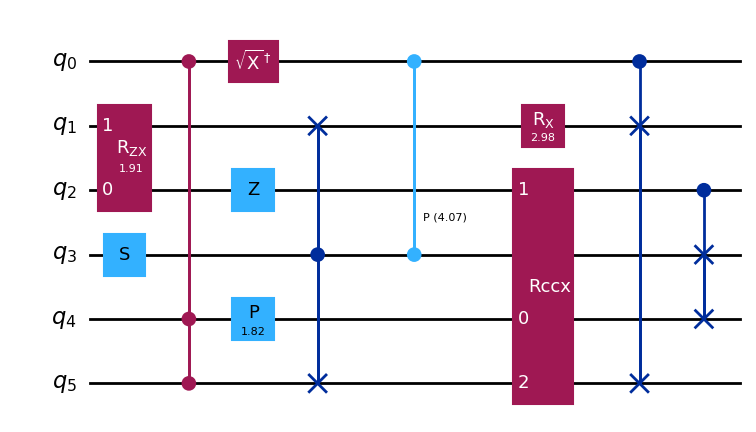

In [17]:
### Create a random circuit

## DO NOT CHANGE THE SEED NUMBER
seed = 10000

## Create circuit

num_qubits = 6
depth = 4
qc = random_circuit(num_qubits,depth,measure=False, seed=seed)

qc.draw('mpl')

<div class="alert alert-block alert-warning">

<b>Ï£ºÏùòÌïòÏÑ∏Ïöî!</b>
    
Ï±ÑÏ†êÏùÑ ÏúÑÌï¥ÏÑú, Îû© Ï†ÑÏ≤¥ ÏΩîÎìúÏóêÏÑú `seed`ÎÇò `seed_transpiler`Ïùò Í∞íÏùÑ Î≥ÄÍ≤ΩÌïòÏßÄ ÎßàÏÑ∏Ïöî.
</div>

Í∞Å ÏµúÏ†ÅÌôî Î†àÎ≤®ÏùÑ ÌÖåÏä§Ìä∏ÌïòÍ∏∞ ÏúÑÌï¥, Î®ºÏ†Ä `FakeTorino`Î•º Ìò∏Ï∂úÌïòÏó¨ `backend`Î°ú ÏßÄÏ†ïÌï©ÏãúÎã§.

`FakeTorino`Îäî IBM QuantumÏùò Í∞ÄÏû• ÏµúÏã†Ïùò Heron Ïπ©ÏùÑ ÌÉëÏû¨Ìïú ibm_torinoÏùò Ïó∞Í≤∞ Íµ¨Ï°∞ÏôÄ ÎÖ∏Ïù¥Ï¶à ÌäπÏÑ±ÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§.

In [18]:
## Save FakeTorino as backend
backend = FakeTorino()

## Check basis gate set of FakeTorino
backend.configuration().basis_gates

['cz', 'id', 'rz', 'sx', 'x']

ÎÑ§ Í∞úÏùò Î™®Îì† ÏµúÏ†ÅÌôî Î†àÎ≤®ÏùÑ ÏÇ¨Ïö©Ìï¥ Î≥∏ ÌõÑ ÎßàÏßÄÎßâÏóê Í≤∞Í≥ºÎì§ÏùÑ ÎπÑÍµêÌï¥ Î≥¥Í≤å Îê† Í≤ÉÏûÖÎãàÎã§. Í∑∏Îü¨Í∏∞ ÏúÑÌï¥ÏÑú, Í∞Å Í≥ÑÏÇ∞ Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌïòÍ≥† ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàò(ÎîïÏÖîÎÑàÎ¶¨ ÏûêÎ£åÌòï)ÏùÑ ÏïÑÎûòÏóê ÎßåÎì§Ïñ¥ ÎëêÏóàÏäµÎãàÎã§.

Îã§ÏùåÏùò ÏΩîÎìú ÏÖÄÏóê ÌïÑÏöîÌïú Î≥ÄÏàòÎ•º ÏÑ†Ïñ∏Ìï¥ ÎëêÏóàÏäµÎãàÎã§. ÏàòÏ†ïÌï† ÌïÑÏöî ÏóÜÏù¥ Ïã§ÌñâÏãúÌÇ§Í≥† Í∑∏ Îã§ÏùåÏúºÎ°ú ÎÑòÏñ¥Í∞ÄÏãúÎ©¥ Îê©ÎãàÎã§.

In [19]:
circuit_depths = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}
gate_counts = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

scores = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

### Optimization level = 0

<div class="alert alert-block alert-info">

Optimization levelÏóê ÎåÄÌïú ÎÑ§ Í∞ÄÏßÄ ÏÑπÏÖòÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÎèÑÏõÄÏù¥ ÌïÑÏöîÌïòÍ±∞ÎÇò ÎÇ¥Ïö©ÏùÑ Î™ÖÌôïÌûà Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†µÎã§Î©¥, optimization levelÏóê ÎåÄÌïú Îçî ÏûêÏÑ∏Ìïú Ï†ïÎ≥¥Î•º ÏñªÏùÑ Ïàò ÏûàÎäî <a href="https://docs.quantum.ibm.com/transpile/set-optimization">Ïù¥ Î¨∏ÏÑú</a>Î•º ÌôïÏù∏Ìï¥ Ï£ºÏãúÍ∏∏ Î∞îÎûçÎãàÎã§.

</div>

ÏµúÏ†ÅÌôî Î†àÎ≤® 0ÏùÄ **Ïû•ÎπÑÏùò ÌäπÏÑ±ÏùÑ Ïã§ÌóòÌïòÍ∏∞** ÏúÑÌïú Í≤ÉÏúºÎ°ú, ÎåÄÏÉÅ ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Ïùò Ï†úÏïΩÏóê ÎßûÍ≤å ÏûÖÎ†• ÌöåÎ°úÎ•º Îß§ÌïëÌïòÍ∏∞Îäî ÌïòÏßÄÎßå ÏµúÏ†ÅÌôîÎäî ÏàòÌñâÌïòÏßÄ ÏïäÏäµÎãàÎã§. Ïù¥ Îã®Í≥ÑÏóêÏÑúÎäî [TrivialLayout](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.TrivialLayout#triviallayout)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞ÄÏÉÅ ÌÅêÎπÑÌä∏ÏôÄ ÎèôÏùºÌïú Î¨ºÎ¶¨Ï†Å ÌÅêÎπÑÌä∏Î•º ÏÑ†ÌÉùÌïòÍ≥† [StochasticSwap](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.StochasticSwap#stochasticswap)ÏùÑ ÏÇ¨Ïö©Ìï¥ SWAP Í≤åÏù¥Ìä∏Î•º ÏÇΩÏûÖÌïòÏó¨ ÌöåÎ°úÍ∞Ä ÏûëÎèôÌïòÎèÑÎ°ù ÎßåÎì≠ÎãàÎã§.

Faketorino ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ†ÅÌôî Î†àÎ≤® 0ÏúºÎ°ú pass managerÎ•º ÎßåÎì§Ïñ¥Î≥¥Í≥† Í∑∏ Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.

In [20]:
# Make a pass manager with our desired optimization level and backend
pm_lv0 = generate_preset_pass_manager(backend=backend, optimization_level=0, seed_transpiler=seed)

# Run for our random circuit
tr_lv0 = pm_lv0.run(qc)

# uncomment the next line to draw circuit
#tr_lv0.draw('mpl', idle_wires=False, fold=60)

ÏïûÏÑú Ïñ∏Í∏âÌñàÎìØÏù¥, ÏµúÏ†ÅÌôî Î†àÎ≤® 0ÏóêÏÑúÎäî Î∞±ÏóîÎìúÏùò basis Í≤åÏù¥Ìä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ Í∏∞Î≥∏Ï†ÅÏù∏ Í≤åÏù¥Ìä∏ Î∂ÑÌï¥Î•º ÏàòÌñâÌïòÎ©∞, ÎÖºÎ¶¨ ÌÅêÎπÑÌä∏Î•º Î¨ºÎ¶¨ ÌÅêÎπÑÌä∏Ïóê ÎèôÏùºÌïú ÏàúÏÑúÎ°ú Îß§ÌïëÌï©ÎãàÎã§. Ï¶â, ÎÖºÎ¶¨ ÌÅêÎπÑÌä∏ 0ÏùÄ Ïã§Ï†ú ÌïòÎìúÏõ®Ïñ¥Ïùò ÌÅêÎπÑÌä∏ 0Î≤àÏóê Îß§ÌïëÎêòÍ≥†, ÎÖºÎ¶¨ ÌÅêÎπÑÌä∏ 1ÏùÄ Ïã§Ï†ú ÌïòÎìúÏõ®Ïñ¥Ïùò ÌÅêÎπÑÌä∏ 1Î≤àÏóê Îß§ÌïëÎê©ÎãàÎã§.

<div class="alert alert-block alert-success">

### Exercise 2: (Start)

**Ìï¥ÏïºÌï† Ïùº:** Ï£ºÏñ¥ÏßÑ ÎûúÎç§ÌöåÎ°úÎ•º transpile ÌïòÏó¨ ÌöåÎ°úÏùò ÍπäÏù¥(circuit depth)ÏôÄ, Ï†ÑÏ≤¥ Í≤åÏù¥Ìä∏ ÏàòÏùò Ìï©, Í∑∏Î¶¨Í≥† ÌöåÎ°úÏùò ÏÑ±Îä•ÏùÑ 'scoring' Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ÑÏÇ∞Ìïú ÌõÑ ÏïûÏÑú ÎßåÎì§Ïñ¥Îëî Î≥ÄÏàòÏóê Ï†ÄÏû•Ìï¥Ï£ºÏÑ∏Ïöî.

ÏïÑÎûòÏùò ÌåÅÏùÑ Ï∞∏Í≥†ÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§.

</div>

<div class="alert alert-block alert-info">

ÌåÅ:
- `circuit_depths`: [IBM Documentation](https://docs.quantum.ibm.com/api/qiskit/0.42/circuit)ÏóêÏÑú ÌöåÎ°úÏùò ÍπäÏù¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- `gate_counts`: Ïö∞Î¶¨Îäî Ï¢ÖÏ¢Ö ÌöåÎ°úÏùò "ÌÅ¨Í∏∞"Î•º Î™ÖÎ†πÏñ¥Ïùò Ï¥ù Í∞úÏàòÎ°ú ÎÇòÌÉÄÎÉÖÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Ï†ïÎ≥¥Îäî [Size](https://docs.quantum.ibm.com/api/qiskit/0.42/qiskit.circuit.QuantumCircuit#size)ÏóêÏÑú ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- `scores`: Ïù¥Ï†ÑÏóê ÏûëÏÑ±Ìïú `scoring` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.

</div>

In [21]:
### Your code here ###

circuit_depths['opt_lv_0'] = tr_lv0.depth()
gate_counts['opt_lv_0'] = tr_lv0.size()
scores['opt_lv_0'] = scoring(tr_lv0, backend)

### Don't change code after this line ###

print("Optimization level 0 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_0'])
print("Gate count:", gate_counts['opt_lv_0'])
print("Score:", scores['opt_lv_0'])

Optimization level 0 results
Circuit depth: 327
Gate count: 566
Score: 1547


### Optimization level = 1

ÏµúÏ†ÅÌôî Î†àÎ≤® 1ÏùÄ **Í∞ÄÎ≤ºÏö¥ ÏµúÏ†ÅÌôî**Î•º ÏàòÌñâÌï©ÎãàÎã§. Í∑∏ ÏùòÎØ∏Îäî Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§:

- **Layout/Routing**: Î†àÏù¥ÏïÑÏõÉÏùÄ Î®ºÏ†Ä [TrivialLayout](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.TrivialLayout#triviallayout)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏãúÎèÑÎê©ÎãàÎã§. Ï∂îÍ∞ÄÏ†ÅÏù∏ SWAPÏù¥ ÌïÑÏöîÌï† Í≤ΩÏö∞ [SabreSWAP](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.SabreSwap#sabreswap)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏÜåÌïúÏùò SWAPÏùÑ Ìè¨Ìï®Ìïú Î†àÏù¥ÏïÑÏõÉÏùÑ Ï∞æÏùÄ ÌõÑ, [VF2LayoutPostLayout](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.VF2PostLayout)ÏùÑ ÏÇ¨Ïö©Ìï¥ Í∑∏ÎûòÌîÑÏóêÏÑú Í∞ÄÏû• Ï†ÅÌï©Ìïú ÌÅêÎπÑÌä∏Î•º ÏÑ†ÌÉùÌïòÎ†§Í≥† Ìï©ÎãàÎã§.
- [InverseCancellation](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.InverseCancellation#inversecancellation): ÏÑúÎ°ú ÏÉÅÏáÑÎêòÎäî Ïó≠ Í≤åÏù¥Ìä∏Îì§ÏùÑ Ï∞æÏïÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
- [1Q gate optimization](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.Optimize1qGates#optimize1qgates): 1ÌÅêÎπÑÌä∏ Í≤åÏù¥Ìä∏Î•º ÏµúÏ†ÅÌôîÌï©ÎãàÎã§.

Ïù¥Î≤àÏóêÎäî `generate_preset_pass_manager`Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏßÅÏ†ë pass managerÎ•º ÎßåÎì§Ïñ¥Î≥¥ÏÑ∏Ïöî. FakeTorino Î∞±ÏóîÎìúÎ•º ÏÇ¨Ïö©ÌïòÍ≥†, `optimization_level`ÏùÑ 1Î°ú ÏÑ§Ï†ïÌïòÎ©∞, `seed_transpiler` = `seed`Î°ú ÏÑ§Ï†ïÌï¥ Ï£ºÏÑ∏Ïöî.

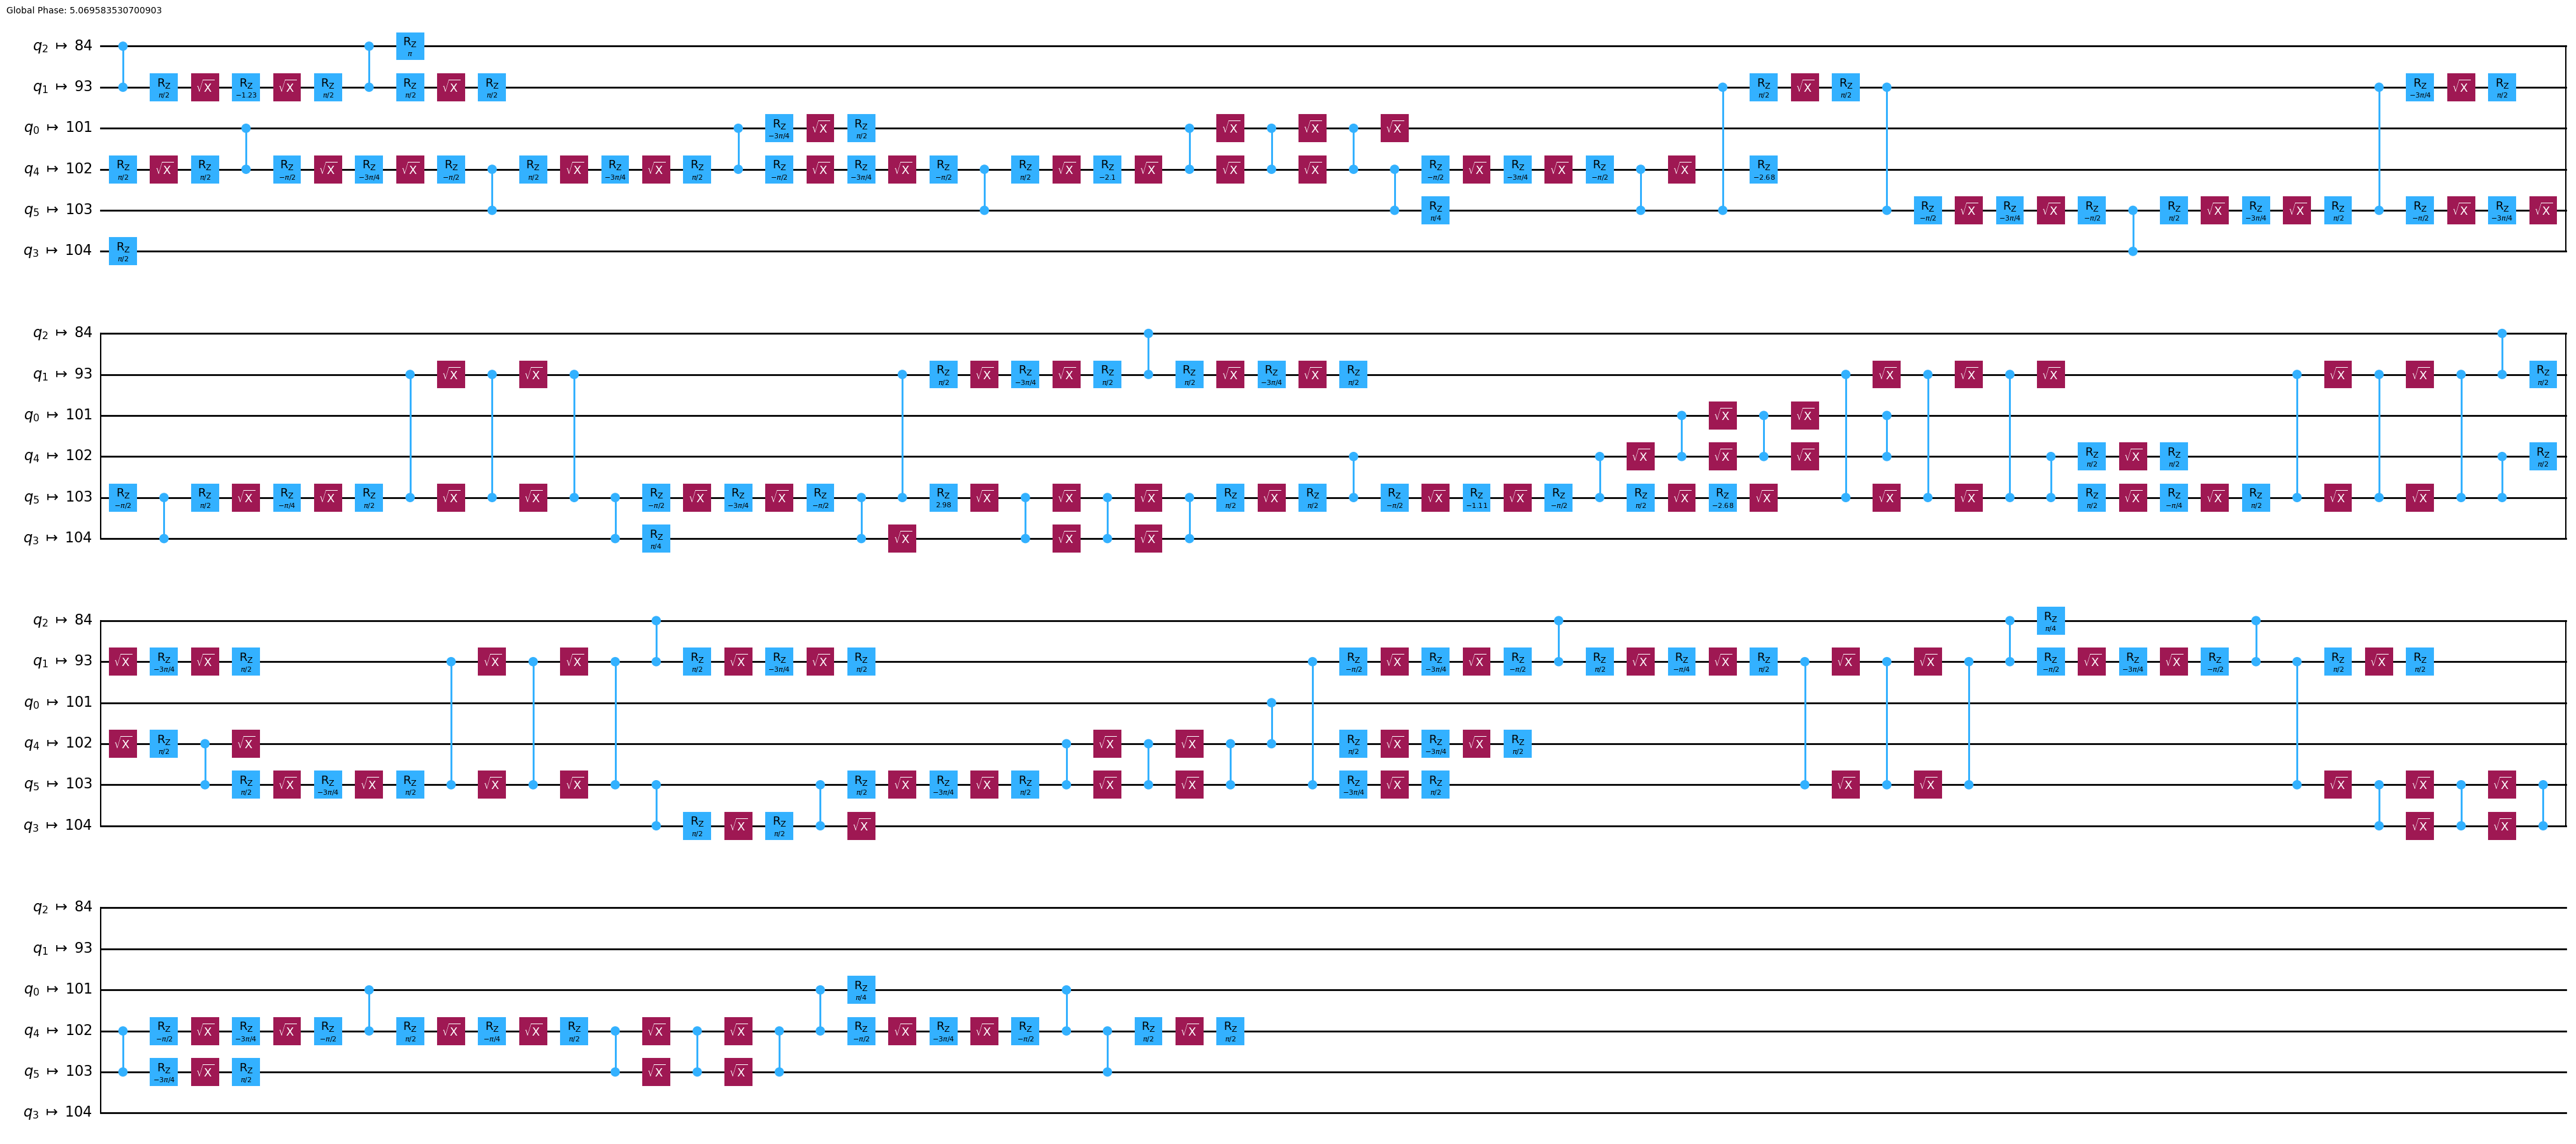

In [22]:
# Make a pass manager with our desired optimization level and backend
pm_lv1 = generate_preset_pass_manager(backend=backend, optimization_level=1, seed_transpiler=seed)### your code here ###

# Run for our random circuit
tr_lv1 = pm_lv1.run(qc)

# uncomment the next line to draw circuit
tr_lv1.draw('mpl', idle_wires=False, fold=60)

Ïù¥Ï†ú ÎÖºÎ¶¨Ï†Å ÌÅêÎπÑÌä∏Í∞Ä ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Ïùò ÏÑúÎ°ú Îã§Î•∏ ÌÅêÎπÑÌä∏Ïóê Îß§ÌïëÎêú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏúºÎ©∞, Í≤åÏù¥Ìä∏ ÏàòÍ∞Ä Îçî Ï†ÅÏñ¥ÏßÑ Í≤ÉÏúº ÌôïÏù∏Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§. ÏßÄÎÇúÎ≤àÍ≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, transpiled circuitÏùò ÌöåÎ°ú ÍπäÏù¥, Ï¥ù Í≤åÏù¥Ìä∏ Í∞úÏàòÏùò Ìï©, `scoring` Ìï®ÏàòÎ•º Ïù¥Ïö©Ìïú Ïù¥ ÌöåÎ°úÏùò ÏÑ±Îä• Ï†êÏàòÎ•º ÏïåÏïÑÎÇ¥Îäî ÏΩîÎìúÎ•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.

In [23]:
### Your code here ###

circuit_depths['opt_lv_1'] = tr_lv1.depth()
gate_counts['opt_lv_1'] = tr_lv1.size()
scores['opt_lv_1'] = scoring(tr_lv1, backend)


### Don't change code after this line ###

print("Optimization level 1 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_1'])
print("Gate count:", gate_counts['opt_lv_1'])
print("Score:", scores['opt_lv_1'])

Optimization level 1 results
Circuit depth: 205
Gate count: 303
Score: 933


### Optimization level = 2

ÏµúÏ†ÅÌôî Î†àÎ≤® 2Îäî **Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÏµúÏ†ÅÌôî**Î•º ÏàòÌñâÌïòÎ©∞, Ïù¥Îäî Îã§ÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§:

- Î†àÏù¥ÏïÑÏõÉ/ÎùºÏö∞ÌåÖ(Layout/Routing): ÏµúÏ†ÅÌôî Î†àÎ≤® 1ÏóêÏÑú ÌïòÎäî Í≤ÉÎì§ + Îçî ÍπäÏùÄ ÌÉêÏÉâÍ≥º ÏµúÏ†ÅÌôî Ìï®ÏàòÏùò ÏãúÎèÑ ÌöüÏàòÎ°ú Ìú¥Î¶¨Ïä§Ìã±ÌïòÍ≤å ÏµúÏ†ÅÌôî Ìï©ÎãàÎã§. [TrivialLayout](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.TrivialLayout#triviallayout)Ïù¥ ÏÇ¨Ïö©ÎêòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê, Ïã§Ï†ú ÌïòÎìúÏõ®Ïñ¥Ïùò ÌÅêÎπÑÌä∏ Î≤àÌò∏ÏôÄ Í∞ÄÏÉÅ ÌÅêÎπÑÌä∏ Î≤àÌò∏Î•º ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÌïòÎ†§Îäî ÏãúÎèÑÎ•º ÌïòÏßÄ ÏïäÏäµÎãàÎã§.
- [CommutativeCancellation](https://docs.quantum.ibm.com/api/qiskit/qiskit.transpiler.passes.CommutativeCancellation#commutativecancellation)ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

Ïù¥Î≤àÏóêÎäî `optimization_level`ÏùÑ 2Î°ú ÏÑ§Ï†ïÌïòÍ≥†, FakeTorino Î∞±ÏóîÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ `generate_preset_pass_manager`Î°ú pass managerÎ•º ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§. `seed_transpiler` = `seed`Î°ú ÏÑ§Ï†ïÌï¥Ï£ºÏÑ∏Ïöî.

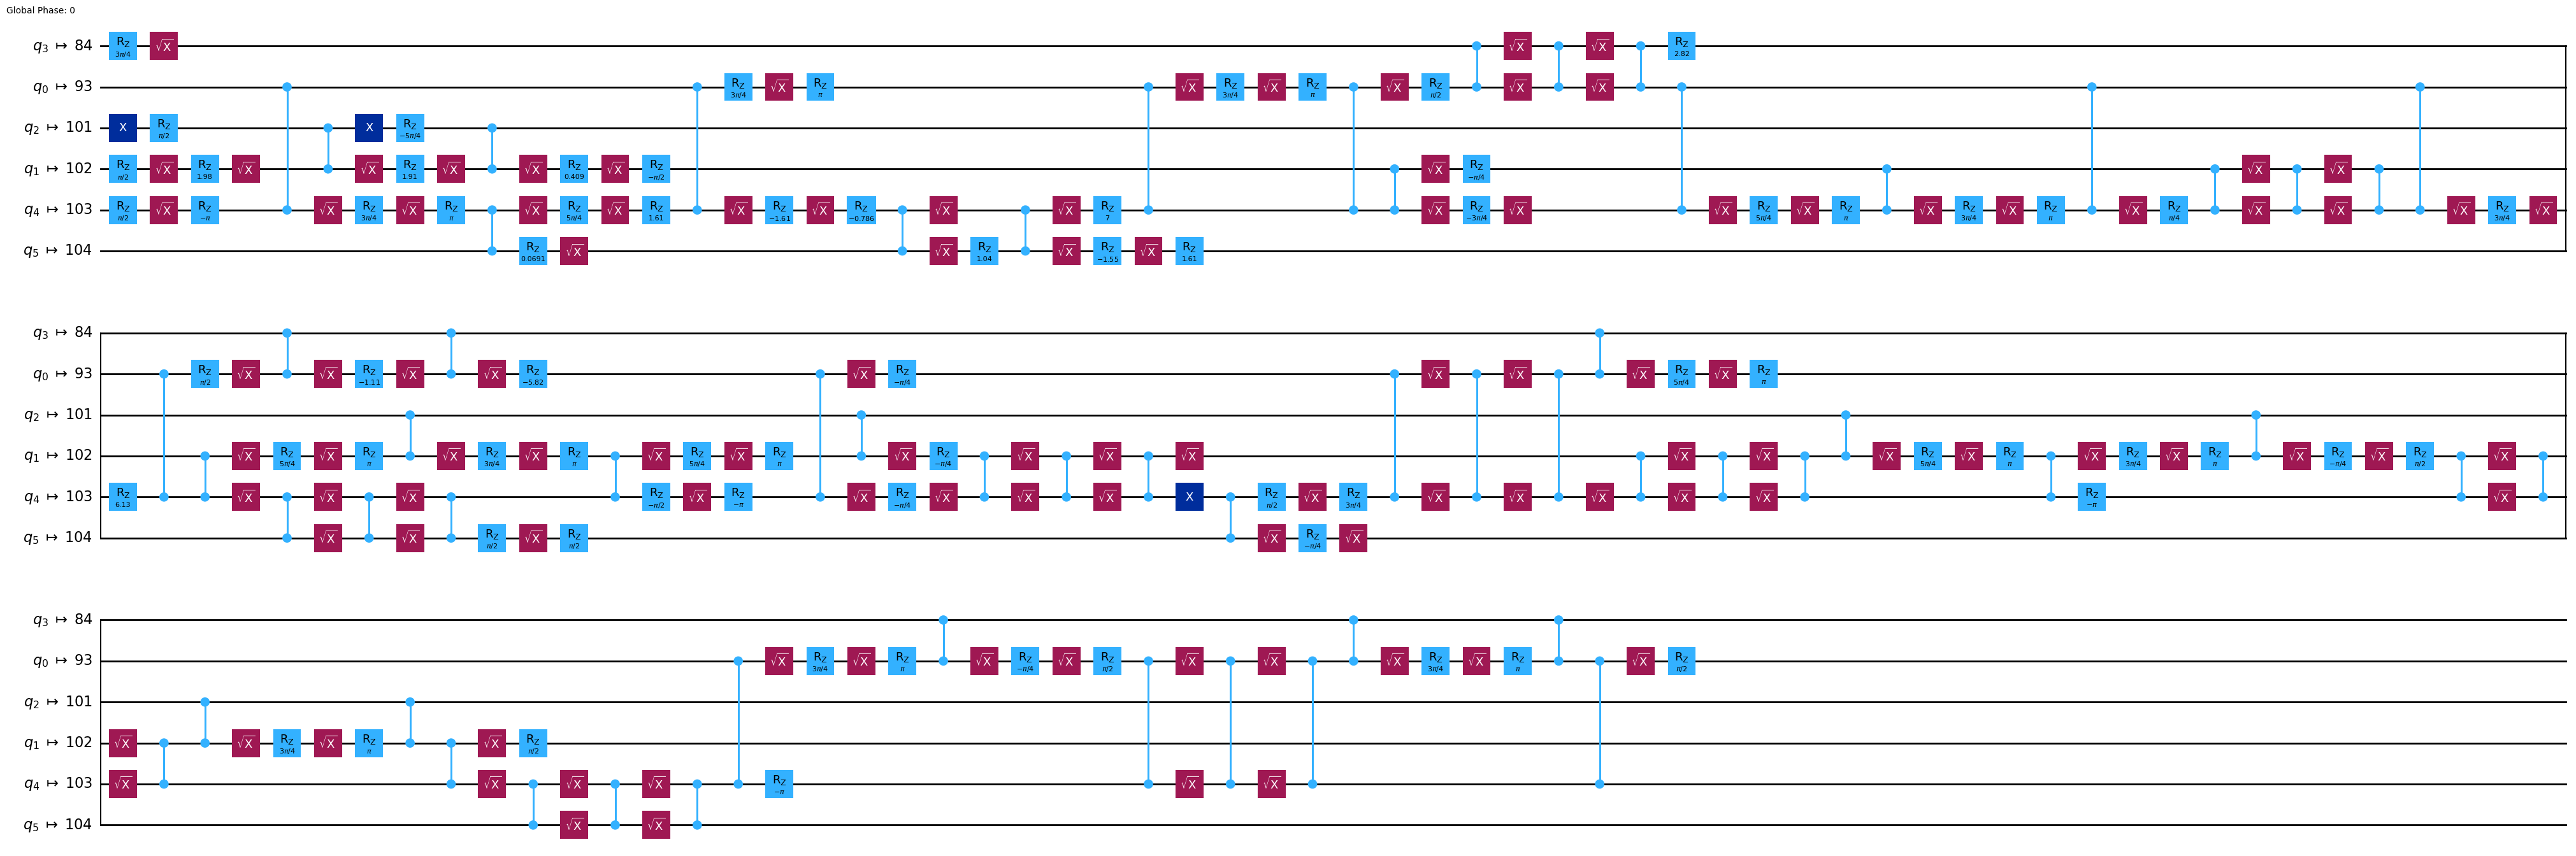

In [29]:
# Make a pass manager with our desired optimization level and backend
pm_lv2 = generate_preset_pass_manager(backend=backend, optimization_level=2, seed_transpiler=seed)### your code here ###

# Run for our random circuit
tr_lv2 = pm_lv2.run(qc)

# uncomment the next line to draw circuit
tr_lv2.draw('mpl', idle_wires=False, fold=60)

Ìïú ÎààÏóê Î≥¥ÏïÑÎèÑ Í≤åÏù¥Ìä∏ ÏàòÍ∞Ä ÏÉÅÎãπÌûà Ï§ÑÏñ¥Îì† Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. ÎÖºÎ¶¨ ÌÅêÎπÑÌä∏Í∞Ä Îß§ÌïëÎêú Ïã§Ï†ú ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Ïùò ÌÅêÎπÑÌä∏Îäî Î≥ÄÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§. Ïù¥Ï†ú transpiling ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. Ïù¥Ï†ÑÍ≥º Í∞ôÏùÄ ÏΩîÎìúÏûÖÎãàÎã§.

In [25]:
### Your code here ###

circuit_depths['opt_lv_2'] = tr_lv2.depth()
gate_counts['opt_lv_2'] = tr_lv2.size()
scores['opt_lv_2'] = scoring(tr_lv2, backend)

### Don't change code after this line ###

print("Optimization level 2 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_2'])
print("Gate count:", gate_counts['opt_lv_2'])
print("Score:", scores['opt_lv_2'])

Optimization level 2 results
Circuit depth: 157
Gate count: 251
Score: 806


### Optimization level = 3

ÏµúÏ†ÅÌôî Î†àÎ≤® 3ÏùÄ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¨Îäî ÎåÄÏã† **Í≥†Í∏â ÏµúÏ†ÅÌôî**Î•º ÏàòÌñâÌï©ÎãàÎã§:

- ÏµúÏ†ÅÌôî Î†àÎ≤® 2ÏóêÏÑú ÌïòÎäî Í≤ÉÎì§ + Î†àÏù¥ÏïÑÏõÉ/ÎùºÏö∞ÌåÖÏóê ÎåÄÌïú Ï∂îÍ∞ÄÏ†ÅÏù∏ Ìú¥Î¶¨Ïä§Ìã± ÏµúÏ†ÅÌôîÎ°ú Îçî ÎßéÏùÄ ÎÖ∏Î†•/ÏãúÌóòÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- [Cartan's KAK Decomposition](https://arxiv.org/abs/quant-ph/0507171)Î•º ÏÇ¨Ïö©ÌïòÏó¨ 2-ÌÅêÎπÑÌä∏ Î∏îÎ°ùÏùò Ïû¨Ìï©ÏÑ±
- Unitarity-breaking Ìå®Ïä§:
    - `OptimizeSwapBeforeMeasure`: SWAP Í≤åÏù¥Ìä∏Î•º Í∞ÄÌïòÎäî Í≤ÉÏùÑ ÏµúÎåÄÌïú Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ Ï∏°Ï†ï Î™ÖÎ†πÏùÑ ÎÇ¥Î¶¨Îäî Í≥†Ï†Ñ ÎπÑÌä∏Î•º Ïû¨ÌÉÄÍ≤üÌåÖÌïòÏó¨ Ï∏°Ï†ï Ï†ÑÏùò SWAP gateÎ•º Ï†úÍ±∞Ìï©ÎãàÎã§.
    - `RemoveDiagonalGatesBeforeMeasure`: Ï∏°Ï†ï Ï†ÑÏóê diagonal Í≤åÏù¥Ìä∏(ÏòàÏãú: RZ, T, Z, Îì±)Î•º Ï†úÍ±∞Ìï©ÎãàÎã§. diagonal 2Q Í≤åÏù¥Ìä∏ÎèÑ Ìè¨Ìï®Ìï©ÎãàÎã§.

Ïù¥Ï†ú Îã§ÏùåÏóê Î¨¥ÏóáÏùÑ Ìï¥ÏïºÌï†ÏßÄ ÏïåÍ≥† Í≥ÑÏãúÏ£†!

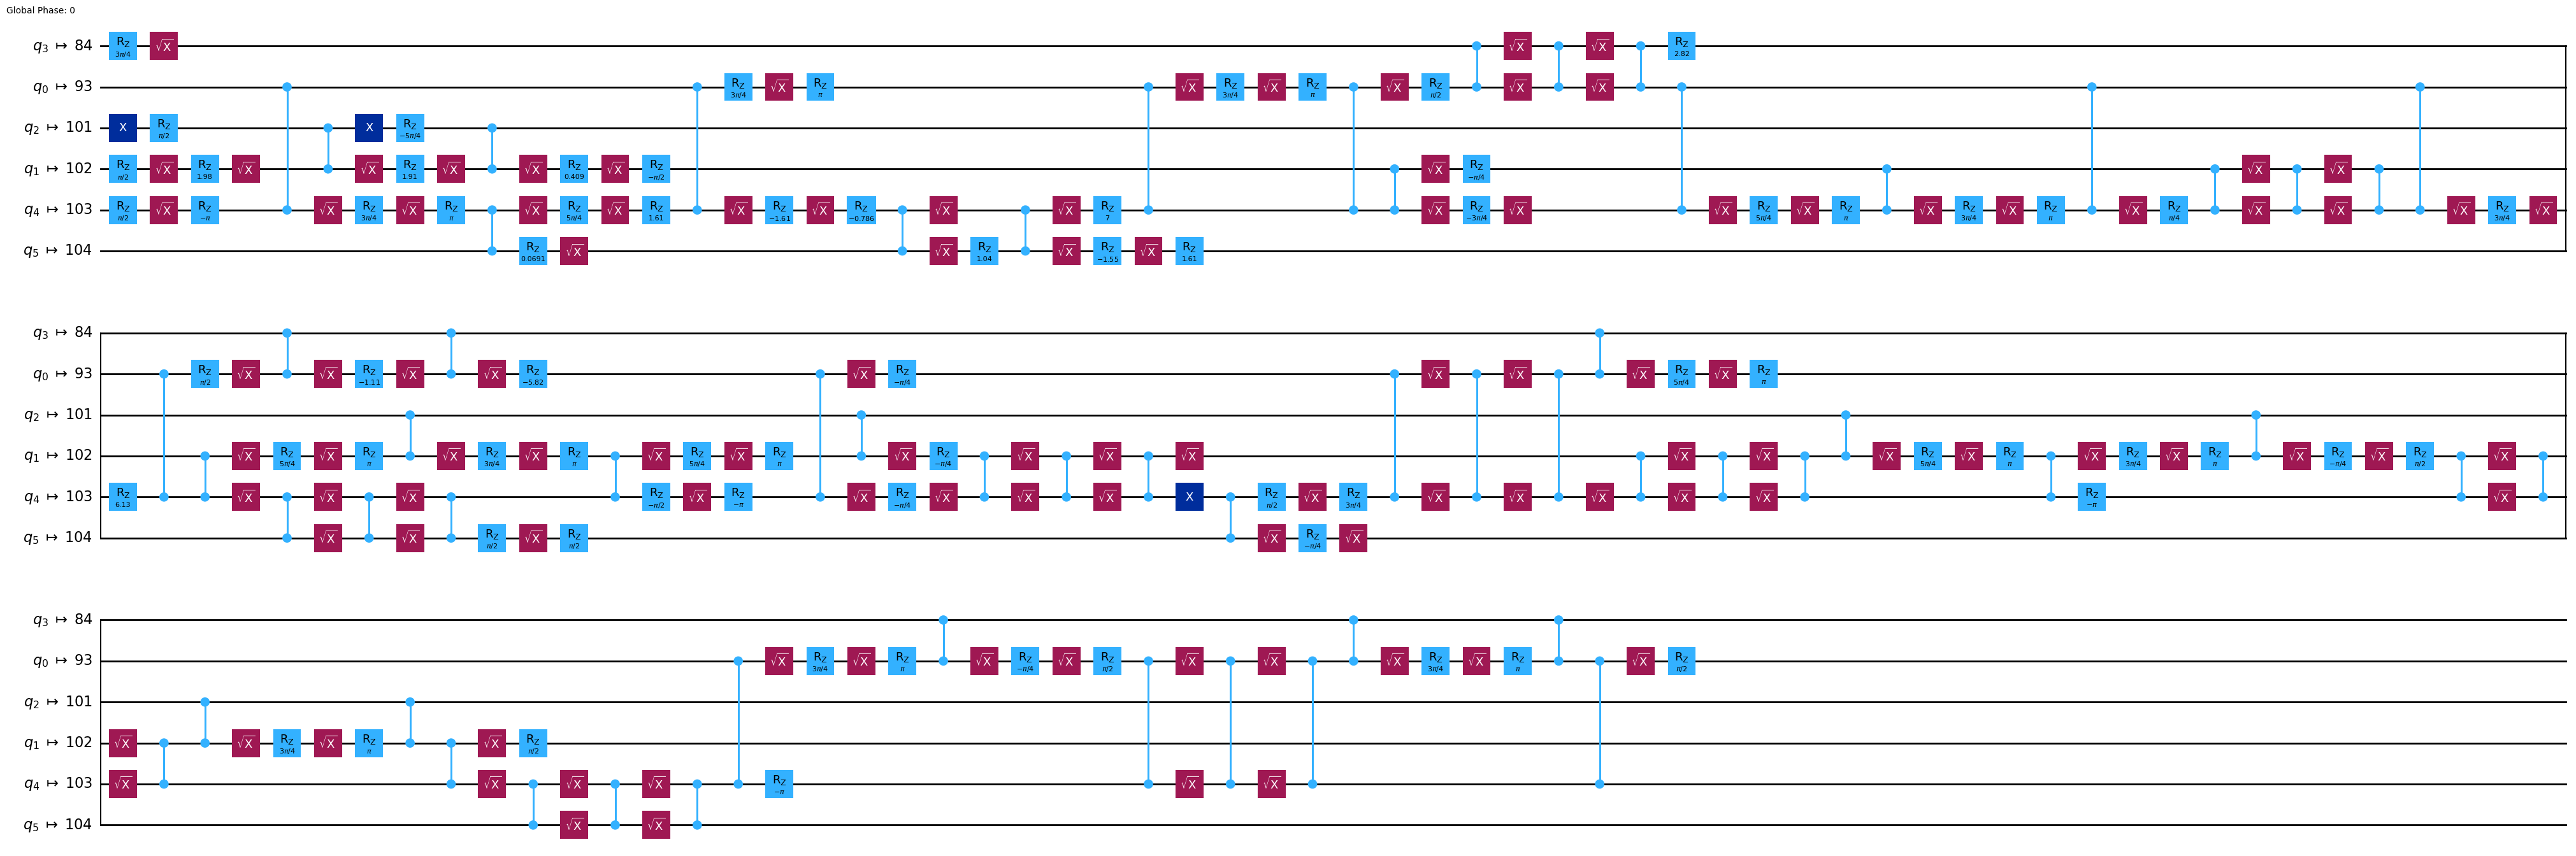

In [26]:
pm_lv3 = generate_preset_pass_manager(backend=backend, optimization_level=3, seed_transpiler=seed)   ### your code here ###

tr_lv3 = pm_lv3.run(qc)### your code here ###

# uncomment to draw circuit
tr_lv3.draw('mpl', idle_wires=False, fold=60)

ÎÜÄÎûçÏßÄ ÏïäÏúºÏã†Í∞ÄÏöî? Ïù¥Ï†ú Í≤åÏù¥Ìä∏ ÏàòÍ∞Ä Ï§ÑÏñ¥Îì§ÏóàÏäµÎãàÎã§. Ïñ¥ÎñªÍ≤å ÏûëÎèôÌñàÎäîÏßÄ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§.

In [27]:
### Your code here ###

circuit_depths['opt_lv_3'] = tr_lv3.depth()
gate_counts['opt_lv_3'] = tr_lv3.size()
scores['opt_lv_3'] = scoring(tr_lv3, backend)

### Don't change code after this line ###

print("Optimization level 3 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_3'])
print("Gate count:", gate_counts['opt_lv_3'])
print("Score:", scores['opt_lv_3'])

Optimization level 3 results
Circuit depth: 157
Gate count: 251
Score: 806


Ïù¥Ï†ú Î™®Îì† Í≤∞Í≥ºÍ∞Ä Ï§ÄÎπÑÎèÑÏóàÏúºÎãà, Í∞Å ÏµúÏ†ÅÌôî ÏàòÏ§ÄÏóê Îã§Îùº ÌöåÎ°úÏùò ÍπäÏù¥, Í≤åÏù¥Ìä∏ Ïàò, ÌèâÍ∞Ä Ï†êÏàòÍ∞Ä Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌñàÎäîÏßÄ Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

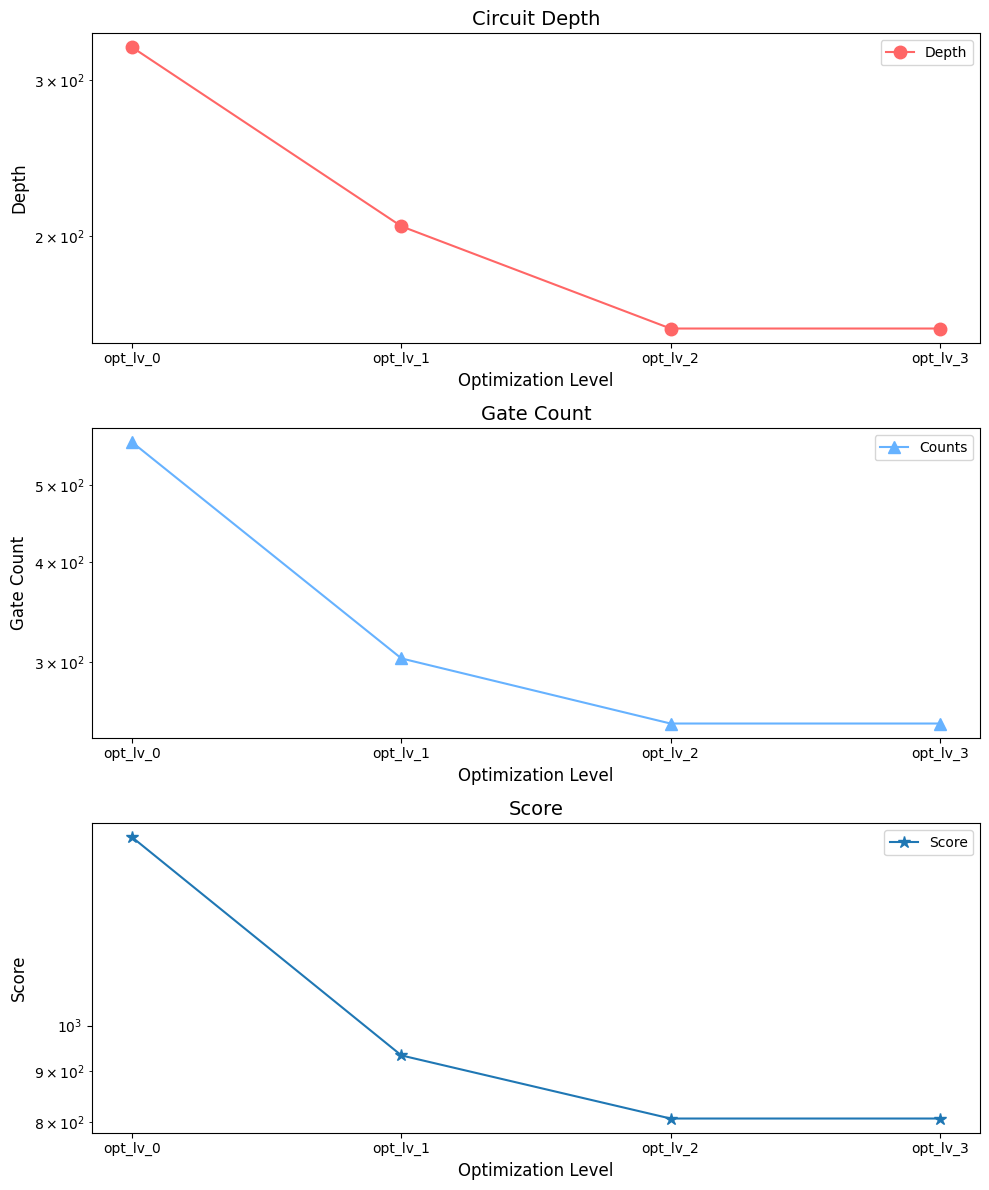

In [28]:
colors = ['#FF6666', '#66B2FF']
ax = ["opt_lv_0", "opt_lv_1", "opt_lv_2", "opt_lv_3"]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Circuit Depth
ax1.semilogy(ax, [circuit_depths[key] for key in ax],'o-',markersize=9, color='#FF6666', label="Depth")
ax1.set_xlabel("Optimization Level", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
ax2.semilogy(ax, [gate_counts[key] for key in ax],'^-',markersize=9, color='#66B2FF', label="Counts")
ax2.set_xlabel("Optimization Level", fontsize=12)
ax2.set_ylabel("Gate Count", fontsize=12)
ax2.set_title("Gate Count", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Score of Transpiled Circuit
ax3.semilogy(ax, [scores[key] for key in ax],'*-',markersize=9, label="Score")
ax3.set_xlabel("Optimization Level", fontsize=12)
ax3.set_ylabel("Score", fontsize=12)
ax3.set_title("Score", fontsize=14)
ax3.legend(fontsize=10)

fig.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### Exercise 2: (Finish)

**Ìï¥ÏïºÌï† Ïùº:** Ïù¥Ï†ú Ïó¨Îü¨Î∂ÑÏùò ÏûëÏóÖÏùÑ Ï†ïÎ¶¨Ìï† ÏãúÍ∞ÑÏûÖÎãàÎã§! ÏúÑÏóêÏÑú Îã§ÏñëÌïú pass managerÎ•º Íµ¨ÏÑ±ÌïòÍ≥† ÌÖåÏä§Ìä∏ÌïòÎ©∞ Í∞Å pass managerÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ìï¥Îãπ Î∞∞Ïó¥Ïóê Ï†ÄÏû•ÌïòÎäî ÎßéÏùÄ ÏûëÏóÖÏùÑ ÌïòÏòÄÏäµÎãàÎã§. Ïù¥ Ï†ïÎ≥¥Î•º Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÇ¥Ïñ¥ Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÎπÑÍµêÌïòÍ∏∞ÎèÑ ÌïòÏòÄÏäµÎãàÎã§. **ÏÜêÏùÑ Îì§Ïñ¥ ÏúÑÏùò ÎåÄÌöå Ïä§ÌÉúÌîÑÎ•º Î∂ÄÎ•¥Í≥† Î∞îÎ°ú ÏúÑÏùò ÏΩîÎìúÏÖÄÏùÑ Ïã§ÌñâÏãúÌÇ® Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï£ºÍ≥† ÌôïÏù∏ÏùÑ Î∞õÏúºÏÑ∏Ïöî.** ÎòêÌïú ÏïÑÎûòÏùò ÏΩîÎìú ÏÖÄÏùÑ Ïã§ÌñâÏãúÏºú ÎÑ§ Í∞úÏùò pass managerÎ•º Î™®Îëê Ï±ÑÏ†êÍ∏∞Ïóê Ï†úÏ∂úÌïòÏÑ∏Ïöî.

seed Í∞íÏù¥ Î≥ÄÍ≤ΩÎêòÏßÄ ÏïäÏïòÎäîÏßÄ Í≥° ÌôïÏù∏ÌïòÏÑ∏Ïöî!

</div>


In [25]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge3b

answer2 = pm_lv0

grade_challenge3b(answer2, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


In [26]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge3c

answer3 = pm_lv1

grade_challenge3c(answer3, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


In [27]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge3d

answer4 = pm_lv2

grade_challenge3d(answer4, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


In [28]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge3e

answer5 = pm_lv3

grade_challenge3e(answer5, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


In [29]:
### Grader Cell - Submit your answer by running the following code
### You do not need to add any code into this cell

from qff_2024ku_grader.challenges.qff_ku2024 import grade_challenge3f

answer6 = [circuit_depths, gate_counts, scores]

grade_challenge3f(answer6, username)

Grading your answer. Please wait...

Congratulations üéâ! Your answer is correct.


# Congratulations!

Ïó¨Îü¨Î∂ÑÏùÄ transpile Ïùò 6Í∞ÄÏßÄ Îã®Í≥ÑÏóê ÎåÄÌïú Í∞úÎÖêÏùÑ ÏùµÌûàÍ≥†, QiskitÏóêÏÑú ÎØ∏Î¶¨ Íµ¨Ï∂ïÌï¥Îëî 4Í∞ÄÏßÄ ÏàòÏ§Ä(optimization level)Ïùò transpilationÏùÑ Íµ¨ÌòÑÌï¥Î≥¥ÏïòÏäµÎãàÎã§. ÏÇ¨Ïã§ Ïó¨Îü¨Î∂ÑÏùò ÏñëÏûê ÌöåÎ°úÏôÄ ÏÑ†ÌÉùÌïú ÏñëÏûê ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº, QiskitÏóêÏÑú ÎØ∏Î¶¨ Íµ¨Ï∂ïÌï¥Îëî 4Í∞ÄÏßÄ transpilationÏùÑ Ïù¥Ïö©ÌïòÎäî Í≤ÉÎ≥¥Îã§Îäî Ïª§Ïä§ÌÖÄ pass managerÎ•º Íµ¨ÏÑ±ÌïòÏó¨ transpilationÏùÑ ÏãúÌÇ§Îäî Í≤ÉÏù¥ ÎçîÏö± Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏñªÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§. 2024 Qiskit Fall Fest at Korea UniversityÏóêÏÑúÎäî Ïª§Ïä§ÌÖÄ pass managerÎ•º ÎßåÎìúÎäî ÎÇ¥Ïö©ÍπåÏßÄ Îã§Î£®ÏßÄÎäî ÏïäÍ≤†ÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌï¥ Í¥ÄÏã¨Ïù¥ ÏûàÏúºÏã† Î∂ÑÏùÄ [Transpiler Guide](https://docs.quantum.ibm.com/guides/transpile) Î•º Ï∞∏Í≥†Ìï¥Ï£ºÏÑ∏Ïöî!

Îã§Î•∏ Ï±åÎ¶∞ÏßÄ ÎÖ∏Ìä∏Î∂ÅÎèÑ ÌååÏù¥ÌåÖÏûÖÎãàÎã§!